In [1]:
# pip install pivottablejs

In [2]:
import numpy as np
import pandas as pd

data = r"C:\Users\bolaj\Desktop\Desk\Data\Finance Loan Approval\Finance_Loan_Approval\data\train.csv"
data1 = r"C:\Users\bolaj\Desktop\Desk\Data\Finance Loan Approval\Finance_Loan_Approval\data\test.csv"

In [3]:
Train = pd.read_csv(data)
Test = pd.read_csv(data1)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pivottablejs import pivot_ui

import warnings
warnings.filterwarnings("ignore")

#import pipeline and transformers
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

#import preprocessors 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer

from sklearn.metrics import classification_report, confusion_matrix,make_scorer,f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

import time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


#import train_test split
from sklearn.model_selection import GridSearchCV,train_test_split

from sklearn.base import BaseEstimator, TransformerMixin

In [5]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
Train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
Train = Train.dropna(subset=['Credit_History'])

In [8]:
Train['Credit_History'] = Train['Credit_History'].astype('category')

In [9]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            564 non-null    object  
 1   Gender             552 non-null    object  
 2   Married            561 non-null    object  
 3   Dependents         549 non-null    object  
 4   Education          564 non-null    object  
 5   Self_Employed      538 non-null    object  
 6   ApplicantIncome    564 non-null    int64   
 7   CoapplicantIncome  564 non-null    float64 
 8   LoanAmount         543 non-null    float64 
 9   Loan_Amount_Term   550 non-null    float64 
 10  Credit_History     564 non-null    category
 11  Property_Area      564 non-null    object  
 12  Loan_Status        564 non-null    object  
dtypes: category(1), float64(3), int64(1), object(8)
memory usage: 58.0+ KB


In [10]:
print(Train.shape, "\n") 
print(Train.columns, "\n") 

(564, 13) 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object') 



In [11]:
Train = Train.drop('Loan_ID',axis=1)

In [12]:
pivot_ui(Train)

In [13]:
Train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
Train['Loan_Amount_Term'].nunique()

9

In [15]:
Train['Loan_Status'] = Train['Loan_Status'].replace({'Y': 1, 'N': 0})

In [16]:
X ,y = Train.drop(['Loan_Status','Gender','CoapplicantIncome'],axis=1),Train['Loan_Status']

# Set a random seed for reproducibility
random_seed = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.4, train_size=0.6, random_state=random_seed)

In [17]:
X_train.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
384,Yes,2,Graduate,No,4566,100.0,360.0,1.0,Urban
296,Yes,1,Graduate,No,6875,200.0,360.0,1.0,Semiurban
5,Yes,2,Graduate,Yes,5417,267.0,360.0,1.0,Urban
126,Yes,3+,Graduate,No,23803,370.0,360.0,1.0,Rural
49,No,0,Graduate,No,4000,144.0,360.0,1.0,Semiurban


In [18]:
categorical_features = X_train.select_dtypes(exclude=['float64','int64']).columns.tolist()

In [19]:
categorical_features

['Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

In [20]:
#numerical features excluding booleans and object to list 
numeric_features = X_train.select_dtypes(exclude=['bool', 'object','category']).columns.tolist()

In [21]:
numeric_features

['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [22]:
numeric_features

['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [23]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')

In [24]:
#setting up a pipeline for scaling the numerical features
numeric_transformer = Pipeline(
    steps=[ 
        ('imputer', numerical_imputer),
        ("scaler", StandardScaler())
    ]
).set_output(transform='pandas')
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [25]:
# Define preprocessing steps for categorical and numerical data
categorical_pipeline = Pipeline([
    ('imputer', categorical_imputer),
    ('encoder', OneHotEncoder(sparse=False, 
        handle_unknown='infrequent_if_exist',min_frequency =0.01))
])
categorical_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                               min_frequency=0.01, sparse=False))])

In [26]:
# Define column transformer to apply different preprocessing steps to different columns
Fill_na = ColumnTransformer([
    ('categorical', categorical_pipeline, categorical_features),
    ('numerical', numeric_transformer, numeric_features)
])

In [27]:
Train.isna().sum()

Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('Fill_na',Fill_na, categorical_features + numeric_features),
        ("num", numeric_transformer, numeric_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform='pandas')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('Fill_na',
                                 ColumnTransformer(transformers=[('categorical',
                                                                  Pipeline(steps=[('imputer',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('encoder',
                                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                                 min_frequency=0.01,
                                                                                                 sparse=False))]),
                                                                  ['Married',
                                                                   'Dependents',
                                                                   'Education',
                                                                   'Self_Employed',
                                                                   'Credit_History',
                                                                   '...
                                                                   'LoanAmount',
                                                                   'Loan_Amount_Term'])]),
                                 ['Married', 'Dependents', 'Education',
                                  'Self_Employed', 'Credit_History',
                                  'Property_Area', 'ApplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['ApplicantIncome', 'LoanAmount',
                                  'Loan_Amount_Term'])],
                  verbose_feature_names_out=False)

In [29]:
numeric_features

['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [30]:
categorical_features

['Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

In [31]:
X_train.columns

Index(['Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'],
      dtype='object')

In [32]:
X_train = preprocessor.fit_transform(X_train,y_train)

In [33]:
X_test=preprocessor.transform(X_test)

In [34]:
X_train.head()

,categorical__Married_No,categorical__Married_Yes,categorical__Dependents_0,categorical__Dependents_1,categorical__Dependents_2,categorical__Dependents_3+,categorical__Education_Graduate,categorical__Education_Not Graduate,categorical__Self_Employed_No,categorical__Self_Employed_Yes,...,categorical__Credit_History_1.0,categorical__Property_Area_Rural,categorical__Property_Area_Semiurban,categorical__Property_Area_Urban,numerical__ApplicantIncome,numerical__LoanAmount,numerical__Loan_Amount_Term,ApplicantIncome,LoanAmount,Loan_Amount_Term
384,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,-0.156033,-0.531303,0.303625,-0.156033,-0.531303,0.303625
296,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.259095,0.670466,0.303625,0.259095,0.670466,0.303625
5,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,-0.003034,1.475651,0.303625,-0.003034,1.475651,0.303625
126,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,3.302529,2.713473,0.303625,3.302529,2.713473,0.303625
49,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,-0.257792,-0.002524,0.303625,-0.257792,-0.002524,0.303625


In [35]:
X_train[['numerical__LoanAmount','LoanAmount']]

,numerical__LoanAmount,LoanAmount
384,-0.531303,-0.531303
296,0.670466,0.670466
5,1.475651,1.475651
126,2.713473,2.713473
49,-0.002524,-0.002524
...,...,...
75,-0.375073,-0.375073
114,-0.314984,-0.314984
292,-0.122701,-0.122701
472,-0.531303,-0.531303


In [36]:
X_train.drop(['numerical__LoanAmount','numerical__Loan_Amount_Term'],axis=1,inplace=True)

In [37]:
X_train.columns

Index(['categorical__Married_No', 'categorical__Married_Yes',
       'categorical__Dependents_0', 'categorical__Dependents_1',
       'categorical__Dependents_2', 'categorical__Dependents_3+',
       'categorical__Education_Graduate',
       'categorical__Education_Not Graduate', 'categorical__Self_Employed_No',
       'categorical__Self_Employed_Yes', 'categorical__Credit_History_0.0',
       'categorical__Credit_History_1.0', 'categorical__Property_Area_Rural',
       'categorical__Property_Area_Semiurban',
       'categorical__Property_Area_Urban', 'numerical__ApplicantIncome',
       'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term'],
      dtype='object')

In [38]:
X_test.columns

Index(['categorical__Married_No', 'categorical__Married_Yes',
       'categorical__Dependents_0', 'categorical__Dependents_1',
       'categorical__Dependents_2', 'categorical__Dependents_3+',
       'categorical__Education_Graduate',
       'categorical__Education_Not Graduate', 'categorical__Self_Employed_No',
       'categorical__Self_Employed_Yes', 'categorical__Credit_History_0.0',
       'categorical__Credit_History_1.0', 'categorical__Property_Area_Rural',
       'categorical__Property_Area_Semiurban',
       'categorical__Property_Area_Urban', 'numerical__ApplicantIncome',
       'numerical__LoanAmount', 'numerical__Loan_Amount_Term',
       'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term'],
      dtype='object')

In [39]:
X_test.drop(['numerical__LoanAmount','numerical__Loan_Amount_Term'],axis=1,inplace=True)

In [40]:
Gbrpipeline = Pipeline(
    steps=[
        ("gbr", GradientBoostingClassifier()
        )
    ]
).set_output(transform='pandas')
Gbrpipeline

Pipeline(steps=[('gbr', GradientBoostingClassifier())])

In [41]:
Gbrpipeline.fit(X_train, y_train)

Pipeline(steps=[('gbr', GradientBoostingClassifier())])

In [42]:
Gbrpipeline.score(X_train, y_train), Gbrpipeline.score(X_test,y_test)

(0.9201183431952663, 0.8230088495575221)

In [43]:
# Predict the target values for the test data
y_pred_Gbr = Gbrpipeline.predict(X_test)
y_pred_Gbr

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0], dtype=int64)

In [44]:
# Generate classification report
report = classification_report(y_test, y_pred_Gbr)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.56      0.67        73
           1       0.82      0.95      0.88       153

    accuracy                           0.82       226
   macro avg       0.83      0.75      0.78       226
weighted avg       0.82      0.82      0.81       226



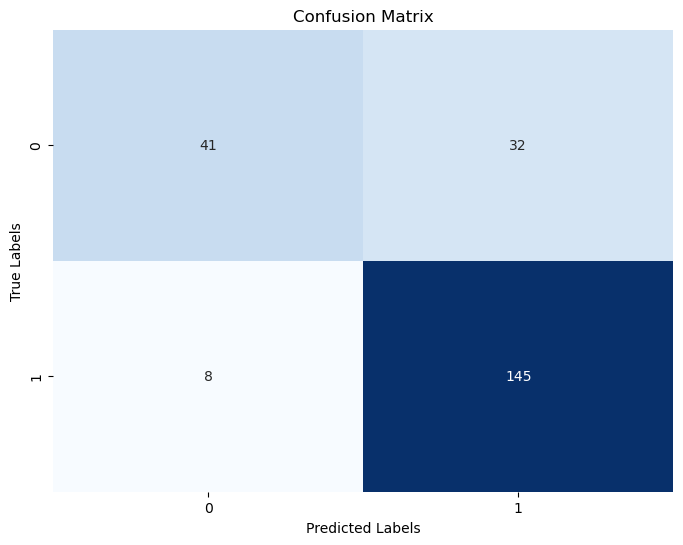

In [45]:
conf_matrix = confusion_matrix(y_test, y_pred_Gbr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Random Forest

In [46]:
Rdpipeline = Pipeline(
    steps=[
        ("gbr", RandomForestClassifier()
        )
    ]
).set_output(transform='pandas')
Rdpipeline

Pipeline(steps=[('gbr', RandomForestClassifier())])

In [47]:
Rdpipeline.fit(X_train, y_train)

Pipeline(steps=[('gbr', RandomForestClassifier())])

In [48]:
X_train.columns

Index(['categorical__Married_No', 'categorical__Married_Yes',
       'categorical__Dependents_0', 'categorical__Dependents_1',
       'categorical__Dependents_2', 'categorical__Dependents_3+',
       'categorical__Education_Graduate',
       'categorical__Education_Not Graduate', 'categorical__Self_Employed_No',
       'categorical__Self_Employed_Yes', 'categorical__Credit_History_0.0',
       'categorical__Credit_History_1.0', 'categorical__Property_Area_Rural',
       'categorical__Property_Area_Semiurban',
       'categorical__Property_Area_Urban', 'numerical__ApplicantIncome',
       'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term'],
      dtype='object')

In [49]:
Rdpipeline.score(X_train, y_train), Rdpipeline.score(X_test,y_test)

(1.0, 0.8141592920353983)

In [50]:
# Predict the target values for the test data
y_pred_Rdn = Rdpipeline.predict(X_test)
y_pred_Rdn

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0], dtype=int64)

In [51]:
# Generate classification report
report_rd = classification_report(y_test, y_pred_Rdn)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.56      0.67        73
           1       0.82      0.95      0.88       153

    accuracy                           0.82       226
   macro avg       0.83      0.75      0.78       226
weighted avg       0.82      0.82      0.81       226



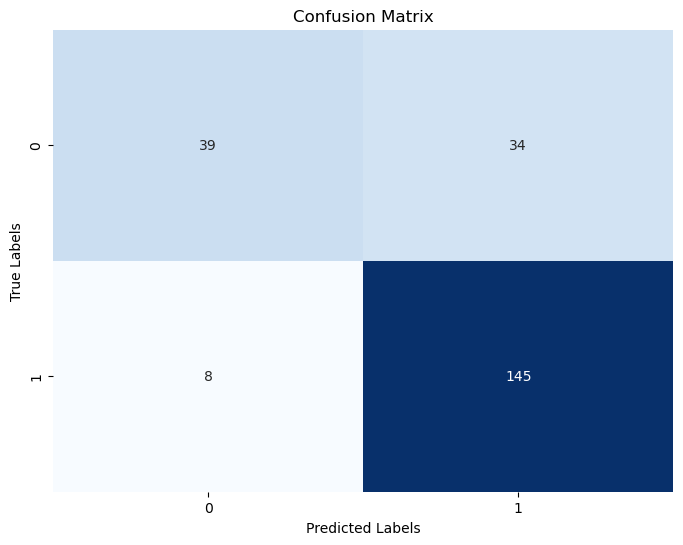

In [52]:
conf_matrix_rd= confusion_matrix(y_test, y_pred_Rdn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rd, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Grid Search

In [53]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [20, 35, 50],
    'learning_rate': [0.01, 0.1], 
    'max_depth': [3,5,10], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [54]:
# # Initialize the gradient boosting classifier
gb_clf = GradientBoostingClassifier()

In [55]:
# Define the scorer using F1-score
scorer = make_scorer(f1_score, pos_label=1) 

In [56]:
# Initialize GridSearchCV with the defined parameter grid and the classifier
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring=scorer, verbose=1)

In [57]:
# Perform grid search on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 35, 50],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring=make_scorer(f1_score, pos_label=1), verbose=1)

In [58]:
# Get the best estimator
best_gb_clf = grid_search.best_estimator_

In [59]:
best_gb_clf

GradientBoostingClassifier(min_samples_leaf=4, min_samples_split=5,
                           n_estimators=20, subsample=0.8)

In [60]:
# best_gb_clf = GradientBoostingClassifier(learning_rate=0.1, 
#                                          max_depth=3, 
#                                          min_samples_leaf=1, 
#                                          min_samples_split=2, 
#                                          n_estimators=50, 
#                                          subsample=0.8)

In [61]:
best_gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(min_samples_leaf=4, min_samples_split=5,
                           n_estimators=20, subsample=0.8)

In [62]:
# Get the best estimator
# best_gb_clf = grid_search.best_estimator_

In [63]:
gb_pred = best_gb_clf.predict(X_test)

In [64]:
# Generate classification report
report = classification_report(y_test, gb_pred)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.51      0.65        73
           1       0.81      0.98      0.88       153

    accuracy                           0.83       226
   macro avg       0.87      0.74      0.77       226
weighted avg       0.84      0.83      0.81       226



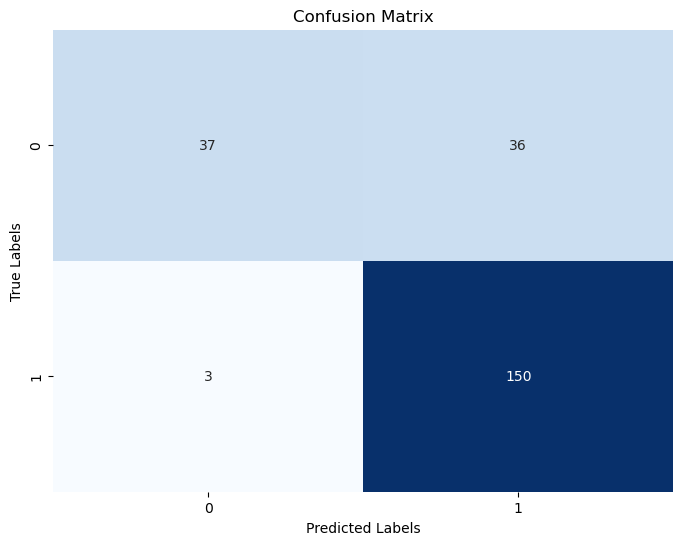

In [65]:
grid_conf_matrix = confusion_matrix(y_test, gb_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(grid_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [66]:
# Specify the columns to drop and column to dropna
columns_to_drop = ['Loan_ID']
column_to_dropna = 'Credit_History'
columns_to_drop2= ['numerical__LoanAmount','numerical__Loan_Amount_Term']

In [67]:
# Custom transformer to drop specified columns
class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Filter out columns that exist in the DataFrame
        existing_columns = [col for col in self.columns if col in X.columns]
        return X.drop(existing_columns, axis=1)

In [68]:
# Custom transformer to drop NA values specifically in the "Credit_History" column
class DropNAForColumn(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[~X[self.column].isnull()]

In [69]:
# Create a Pipeline for dropping columns or rows with missing values
dropper = Pipeline(steps=[
    ('drop_columns', ColumnDropper(columns_to_drop)),  
    ('dropna_credit_history', DropNAForColumn(column='Credit_History'))
])


In [70]:
# Creating the Logistic Regression model with increased max_iter
Saved_model = Pipeline(steps=[
    ('dropper', dropper),
    ('preprocessor', preprocessor),
    ('drop_columns', ColumnDropper(columns_to_drop2)),
    ('classifier', best_gb_clf)
])
Saved_model

Pipeline(steps=[('dropper',
                 Pipeline(steps=[('drop_columns',
                                  ColumnDropper(columns=['Loan_ID'])),
                                 ('dropna_credit_history',
                                  DropNAForColumn(column='Credit_History'))])),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Fill_na',
                                                  ColumnTransformer(transformers=[('categorical',
                                                                                   Pipeline(steps=[('imputer',
                                                                                                    SimpleImputer(strategy='most...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term'])],
                                   verbose_feature_names_out=False)),
                ('drop_columns',
                 ColumnDropper(columns=['numerical__LoanAmount',
                                        'numerical__Loan_Amount_Term'])),
                ('classifier',
                 GradientBoostingClassifier(min_samples_leaf=4,
                                            min_samples_split=5,
                                            n_estimators=20, subsample=0.8))])

In [71]:
Test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [72]:
Test_pred = Saved_model.predict(Test)
Test_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [73]:
# Define the input values for prediction as a DataFrame
testB_value = pd.DataFrame({
    'Loan_ID': ['LP001055'],
    'Gender': ['Female'],
    'Married': ['Yes'],
    'Dependents': ['1'],
    'Education': ['Not Graduate'],
    'Self_Employed': ['Yes'],
    'Property_Area': ['Semiurban'],
    'ApplicantIncome': [2226],
    'CoapplicantIncome': [0],
    'LoanAmount': [59],
    'Loan_Amount_Term': [360],
    'Credit_History': [1]
})

# Predict the output
B_pred = Saved_model.predict(testB_value)

print("Predicted Output:", B_pred)

Predicted Output: [1]


In [74]:
import shap
shap.initjs()

In [75]:
column_names = X_test.columns.tolist()
column_names

['categorical__Married_No',
 'categorical__Married_Yes',
 'categorical__Dependents_0',
 'categorical__Dependents_1',
 'categorical__Dependents_2',
 'categorical__Dependents_3+',
 'categorical__Education_Graduate',
 'categorical__Education_Not Graduate',
 'categorical__Self_Employed_No',
 'categorical__Self_Employed_Yes',
 'categorical__Credit_History_0.0',
 'categorical__Credit_History_1.0',
 'categorical__Property_Area_Rural',
 'categorical__Property_Area_Semiurban',
 'categorical__Property_Area_Urban',
 'numerical__ApplicantIncome',
 'ApplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term']

In [93]:
X100 = shap.utils.sample(X_test, 100)
X100

,categorical__Married_No,categorical__Married_Yes,categorical__Dependents_0,categorical__Dependents_1,categorical__Dependents_2,categorical__Dependents_3+,categorical__Education_Graduate,categorical__Education_Not Graduate,categorical__Self_Employed_No,categorical__Self_Employed_Yes,categorical__Credit_History_0.0,categorical__Credit_History_1.0,categorical__Property_Area_Rural,categorical__Property_Area_Semiurban,categorical__Property_Area_Urban,numerical__ApplicantIncome,ApplicantIncome,LoanAmount,Loan_Amount_Term
459,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.521405,0.521405,0.189759,0.303625
396,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.405217,-0.405217,-0.879816,0.303625
482,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.602444,-0.602444,-0.194807,0.303625
559,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.225430,-0.225430,0.454148,0.303625
322,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.329527,-0.329527,-0.254896,0.303625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.719685,1.719685,1.175209,0.303625
396,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.405217,-0.405217,-0.879816,0.303625
511,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.113468,0.113468,1.271350,0.303625
440,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.318920,-0.318920,0.514236,0.303625


In [94]:
sample_size = 100 # Number of samples to select
random_sample = X_test.sample(n=sample_size, random_state=42)

In [95]:
explainer = shap.Explainer(best_gb_clf.predict, X100)
explainer

In [96]:
shap_values = explainer(random_sample)

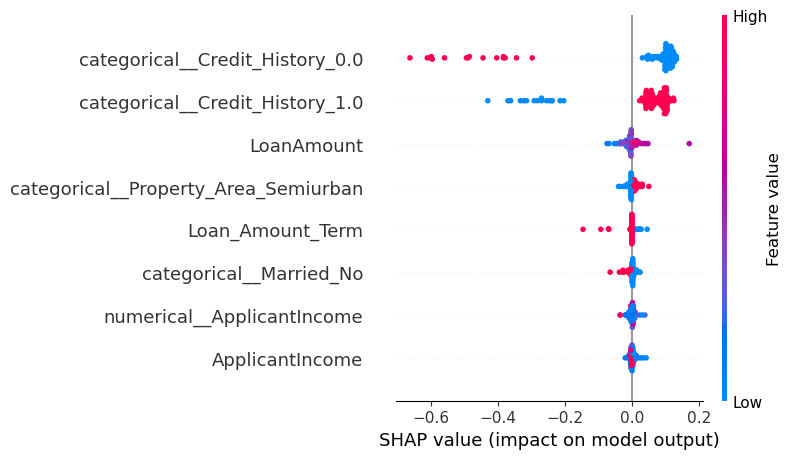

In [97]:
shap.summary_plot(shap_values, random_sample, max_display=8)

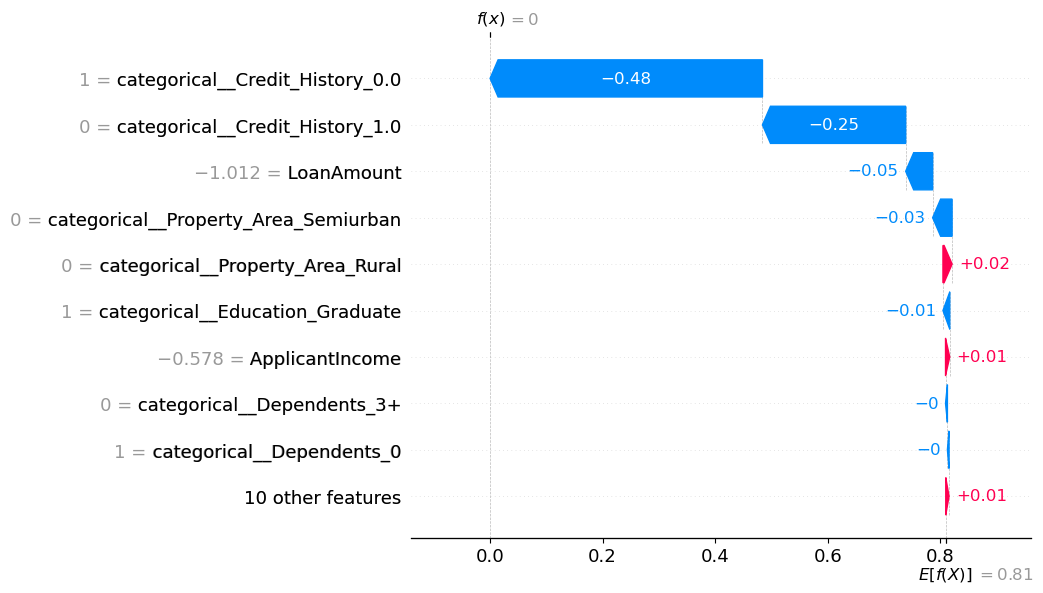

In [98]:
shap.plots.waterfall(shap_values[10])

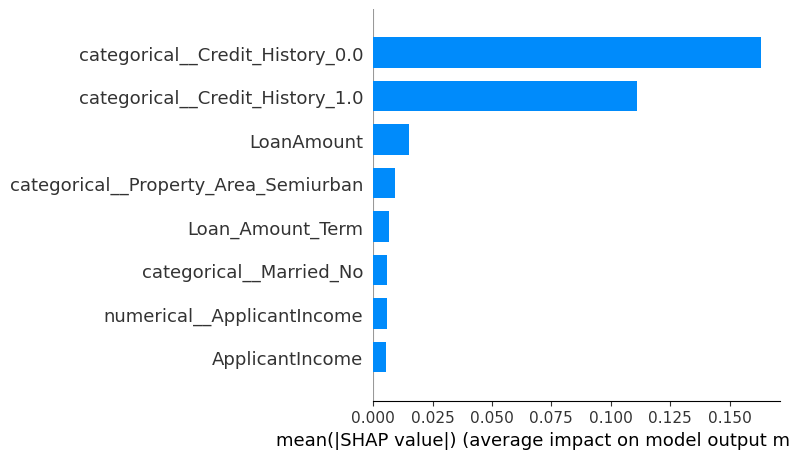

In [99]:
#plot the feature importance
shap.summary_plot(shap_values, random_sample, plot_type="bar",max_display=8)

In [102]:
#set the tree explainer as the model of the pipeline
explainer2 = shap.TreeExplainer(best_gb_clf)

In [104]:
best_gb_clf.predict(random_sample.head(3))

array([1, 1, 0], dtype=int64)

In [105]:
# Create an Explanation object
expected_value = explainer2.expected_value  # Expected value of the model
shap_values2 = shap_values[5]  # Assuming you want to plot for a single instance, adjust as needed

In [106]:
explanation = shap.Explanation(
    values=shap_values2,
    base_values=expected_value,
    data=random_sample,  # Data for the instance you want to explain
    feature_names=column_names
)
explanation

.values =
array([-0.01083333, -0.00333333, -0.00041667,  0.00041667,  0.        ,
       -0.00083333,  0.        ,  0.        ,  0.        ,  0.        ,
        0.10333333,  0.0975    ,  0.0025    ,  0.01125   ,  0.        ,
        0.00125   , -0.00208333, -0.00916667,  0.00041667])

.base_values =
0.81

.data =
array([ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
       -0.13553702, -0.13553702, -0.25489586,  0.30362519])

In [107]:
# Use shap.force_plot with the Explanation object
shap.force_plot(
    explanation.base_values,
    explanation.values,
    features=explanation.data,
    feature_names=explanation.feature_names
)

Deploy

In [108]:
# pip install gradio

In [109]:
import pickle
import gradio as gr

In [110]:
# Save the model
with open('Saved_model.pkl', 'wb') as file:
    pickle.dump(Saved_model, file)

In [111]:
def predict_approval(Gender, Married, Dependents, Education, Self_Employed, Property_Area, ApplicantIncome, CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History):
    # Prepare the input features for prediction
    input_features = pd.DataFrame({
        'Gender': [Gender],
        'Married':[Married],
        'Dependents': [Dependents],
        'Education': [Education],
        'Self_Employed': [Self_Employed],
        'Property_Area': [Property_Area],
        'ApplicantIncome': [ApplicantIncome],
        'CoapplicantIncome': [CoapplicantIncome],
        'LoanAmount': [LoanAmount],
        'Loan_Amount_Term': [Loan_Amount_Term],
        'Credit_History': [Credit_History]
    })


    model = pickle.load(open(r"C:\Users\bolaj\Desktop\Desk\Data\Finance Loan Approval\Finance_Loan_Approval\Model\Saved_model.pkl","rb"))

    # Make predictions on the input features
    predicted_approval = model.predict(input_features)

    # Update the output text box with the predicted result
    if predicted_approval[0] == 1:
        output = "Approved"
    else:
        output = "Sorry, we cannot approve your credit now. Please try again later."
    return output

In [112]:
Train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [113]:
Train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [114]:
Train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [115]:
Train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [116]:
predict_approval("M", "Yes", '1', 'Not Graduate', 'Yes', 'Rural',1000,0,1000,360,1)

'Sorry, we cannot approve your credit now. Please try again later.'

In [117]:
Train['Credit_History'].drop_duplicates().dropna().values.tolist()

[1.0, 0.0]

In [119]:
with gr.Blocks(gr.themes.Soft()) as demo:
    Gender = ['Male', 'Female', 'Others']
    Married = gr.Dropdown(label="Married", choices=Train['Married'].drop_duplicates().dropna().values.tolist())
    Dependents = gr.Dropdown(label="Dependents", choices=Train['Dependents'].drop_duplicates().dropna().values.tolist())
    Education = gr.Dropdown(label="Education", choices=Train['Education'].drop_duplicates().dropna().values.tolist())
    Property_Area = gr.Dropdown(label="Property_Area", choices=Train['Property_Area'].drop_duplicates().dropna().values.tolist())

    with gr.Column():
        CoapplicantIncome = gr.Textbox(label="CoapplicantIncome", placeholder="Input CoapplicantIncome...")
        Self_Employed = gr.Radio(["Yes", "No"], label="Self Employed")
        ApplicantIncome = gr.Textbox(label="Applicant Income", placeholder="Input Income...")
        LoanAmount = gr.Textbox(label="Loan Amount", placeholder="Input Loan Amount...")
        Loan_Amount_Term = gr.Textbox(label="Loan Term", placeholder="Input Loan Term...")
        Credit_History = gr.Radio([1.0, 0.0], label="Credit History")
        Gender = gr.Dropdown(Gender, label="Gender")
        generate_btn = gr.Button("Predict Approval")
        gr.Markdown("Predicted Approval:")
        output = gr.Text(label="Predict Approval")

    generate_btn.click(fn=predict_approval, inputs=[Gender, Married, Dependents, Education, Self_Employed, Property_Area, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History],outputs=output)

# if __name__ == "__main__":
demo.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


Exception in thread Thread-13 (_do_normal_analytics_request):
Traceback (most recent call last):
  File "C:\Users\bolaj\AppData\Roaming\Python\Python310\site-packages\httpx\_transports\default.py", line 69, in map_httpcore_exceptions
    yield
  File "C:\Users\bolaj\AppData\Roaming\Python\Python310\site-packages\httpx\_transports\default.py", line 233, in handle_request
    resp = self._pool.handle_request(req)
  File "C:\Users\bolaj\AppData\Roaming\Python\Python310\site-packages\httpcore\_sync\connection_pool.py", line 216, in handle_request
    raise exc from None
  File "C:\Users\bolaj\AppData\Roaming\Python\Python310\site-packages\httpcore\_sync\connection_pool.py", line 196, in handle_request
    response = connection.handle_request(
  File "C:\Users\bolaj\AppData\Roaming\Python\Python310\site-packages\httpcore\_sync\connection.py", line 99, in handle_request
    raise exc
  File "C:\Users\bolaj\AppData\Roaming\Python\Python310\site-packages\httpcore\_sync\connection.py", line 76,